This lab deals with exploratory data analysis. We will use the [landsat satellite](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29) dataset, which is available in the lab repository.

# Preliminaries

## Landsat satellite dataset

The dataset consists of the four spectral values of pixels in $3 \times 3$ neighbourhoods extracted from a larger satellite image, and the classification associated with the central pixel in each neighbourhood. Two of the four   spectral bands are in the visible region (corresponding approximately to green and red) and two are in the (near) infra-red. Each pixel is an 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. 

**Number of attributes**
36 (= 4 spectral bands x 9 pixels per neighbourhood )

**Attributes**
The attributes are numerical, in the range 0 to 255.

**Classes**
The classes are labeled from 1 to 9 as follows:

1. red soil
2. cotton crop
3. grey soil
4. damp grey soil
5. soil with vegetation stubble
6. mixture class (all types present)
7. very damp grey soil

*NB. There are no examples with class 6 in this dataset, hence it only actually six classes, i.e. 1,2,3,4,5 and 7.*


**Number of examples**
* training set:     4435
* test set:         2000

**Data format**
In each row of the data set, the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. 


## Imports
Execute the cell below to import the packages we will be using throughout this lab. 

In [1]:
# Import required packages 
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive figures, requires installation of ipympl
#%matplotlib ipympl  

# default
%matplotlib inline

# Pandas
[Pandas](http://pandas.pydata.org) is a Python library for data manipulation and analysis. There are two fundamental data structures in pandas: the Series and DataFrame structures which are built on top of NumPy arrays. DataFrame structures are very similar to data frames used in the  R programming language.

There are two complementary views of the DataFrame data structure. In the first view, we
can consider DataFrames to be enhanced (typically two-dimensional) NumPy arrays, as illustrated in the following example.

In [2]:
data = np.array([[11, 12, 13], 
                 [21, 22, 23]])
data

array([[11, 12, 13],
       [21, 22, 23]])

In [3]:
df = pd.DataFrame(data, columns=['col1', 'col2', 'col3'], index=['row1', 'row2'])
df

,col1,col2,col3
row1,11,12,13
row2,21,22,23


The lists provided as `columns` and `index` keyword arguments label the columns and rows of the data structure. If they are omitted, the columns and rows are labelled with numbers starting from 0.

In [4]:
df2 = pd.DataFrame(data)
df2

,0,1,2
0,11,12,13
1,21,22,23


In the second view, we can think that a DataFrame is collection of Python dictionaries, with the column headers corresponding to the dictionary keys. We can, for example, access `col2` via

In [5]:
# dictionary-style indexing
print(df['col2'], end='\n \n')

# attribute-style variant if the column names are strings
print(df.col2)  

row1    12
row2    22
Name: col2, dtype: int64
 
row1    12
row2    22
Name: col2, dtype: int64


For the dataframe `df2` with the default labels, we would use the column _numbers_. Note that the attribute-style access is then not possible.

In [6]:
# dictionary-style indexing
print(df2[1])

0    12
1    22
Name: 1, dtype: int64


We can also retrieve a view for multiple columns at the same time

In [34]:
cols_to_access = ['col1', 'col3']  # list with header names
df[1]

KeyError: 1

In [8]:
cols_to_access = [0, 2]  # list with header names (as numbers not strings)
df2[cols_to_access]

,0,2
0,11,13
1,21,23


We cover next basic features of the Pandas object. For a more detailed introduction to Pandas, see for example the corresponding [book chapter](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html) of the _Python Data Science Handbook_ (optional reading) or the Pandas [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide) (for reference).

## Viewing data
Let's start by loading the  training and test datasets  into Pandas DataFrames.

In [35]:
# assumes that the training and test data has been stored under ./datasets/landsat/
train_path = os.path.join(os.getcwd(), 'datasets', 'landsat', 'landsat_train.csv')
test_path = os.path.join(os.getcwd(), 'datasets', 'landsat', 'landsat_test.csv')
landsat_train = pd.read_csv(train_path, delimiter = ',')
landsat_test = pd.read_csv(test_path, delimiter = ',')

The loaded data sets are stored as DataFrames:

In [36]:
print('Type of the training data: ', type(landsat_train))
print('Type of the test data: ', type(landsat_test))

Type of the training data:  <class 'pandas.core.frame.DataFrame'>
Type of the test data:  <class 'pandas.core.frame.DataFrame'>


We can use the `pandas` [`head()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) method to inspect the  first  `n` entries in the DataFrame. Equivalently, we can use use the `pandas` [`tail()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html) to see the last `n` entries. Note that the last column in the DataFrame, with header `label`, contains the label for each data point.

In [41]:
# Show first 5 instances of the training set
landsat_train.describe(percentiles=None)

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_3_1,pixel_3_2,...,pixel_7_4,pixel_8_1,pixel_8_2,pixel_8_3,pixel_8_4,pixel_9_1,pixel_9_2,pixel_9_3,pixel_9_4,label
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


In [12]:
# Show last 5 instances of the training set
landsat_train.tail(n=5)

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_3_1,pixel_3_2,...,pixel_7_4,pixel_8_1,pixel_8_2,pixel_8_3,pixel_8_4,pixel_9_1,pixel_9_2,pixel_9_3,pixel_9_4,label
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4
4434,71,91,100,81,76,95,108,88,80,95,...,85,70,91,104,85,63,91,100,81,4


`pixel_i_k` here refers to pixel i in spectral band k, where the pixels are scanned row-wise with the top-left pixel of the $3 \times 3$ neighbourhood coming first.

Alternatively, we can use the `pandas` [`sample()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) method to inspect  `n` random entries in the DataFrame. We can set the `random_state` parameter to ensure reproducible results. 

##  Question 1
Inspect 7 random entries in the test dataset. Set the `random_state` parameter to a number of your choice (i.e. `10`) to ensure reproducible results.

In [13]:
# Your code goes here
landsat_test.sample(7, random_state=10)

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_3_1,pixel_3_2,...,pixel_7_4,pixel_8_1,pixel_8_2,pixel_8_3,pixel_8_4,pixel_9_1,pixel_9_2,pixel_9_3,pixel_9_4,label
115,46,34,119,131,52,48,110,105,71,77,...,135,41,31,131,139,44,40,120,120,2
1779,44,29,114,133,47,37,114,122,50,63,...,88,56,61,91,85,56,64,91,85,2
1449,66,109,122,100,66,109,122,100,66,109,...,90,67,102,114,94,67,102,114,90,1
145,89,111,110,87,89,106,110,87,89,106,...,88,88,107,108,88,88,107,113,92,3
1009,67,72,77,62,75,87,96,79,79,99,...,57,67,66,72,60,63,66,68,57,7
1840,84,99,104,79,84,99,104,79,88,99,...,90,92,103,110,86,87,103,110,83,3
579,82,96,100,78,82,96,96,78,82,96,...,80,85,97,101,80,85,97,105,80,4


## Question 2

The `pandas` [`info()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) method provides basic information (i.e. number of rows/columns, variable data types) about a DataFrame.

Display the basic information about the `landsat_train` dataframe. How many attributes/samples are there in the dataset?

In [14]:
# Your code goes here
landsat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 37 columns):
pixel_1_1    4435 non-null int64
pixel_1_2    4435 non-null int64
pixel_1_3    4435 non-null int64
pixel_1_4    4435 non-null int64
pixel_2_1    4435 non-null int64
pixel_2_2    4435 non-null int64
pixel_2_3    4435 non-null int64
pixel_2_4    4435 non-null int64
pixel_3_1    4435 non-null int64
pixel_3_2    4435 non-null int64
pixel_3_3    4435 non-null int64
pixel_3_4    4435 non-null int64
pixel_4_1    4435 non-null int64
pixel_4_2    4435 non-null int64
pixel_4_3    4435 non-null int64
pixel_4_4    4435 non-null int64
pixel_5_1    4435 non-null int64
pixel_5_2    4435 non-null int64
pixel_5_3    4435 non-null int64
pixel_5_4    4435 non-null int64
pixel_6_1    4435 non-null int64
pixel_6_2    4435 non-null int64
pixel_6_3    4435 non-null int64
pixel_6_4    4435 non-null int64
pixel_7_1    4435 non-null int64
pixel_7_2    4435 non-null int64
pixel_7_3    4435 non-null int64
pi

*Your answer goes here*

There are  4435 entries and 37 columns in the  `landsat_train` dataframe.

Alternatively, we can use the `shape` attribute of a DataFrame to get the number of entries (i.e. rows/samples) and columns (i.e. attributes).

In [15]:
print("There are {} rows (observations) and {} columns in the landsat_train DataFrame"\
      .format(landsat_train.shape[0], landsat_train.shape[1]))

There are 4435 rows (observations) and 37 columns in the landsat_train DataFrame


Another very useful `pandas` method is [`describe()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) which  generates summary statistics about the columns in a DataFrame. 

In [16]:
# Summary statistics in train set
landsat_train.describe()

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_3_1,pixel_3_2,...,pixel_7_4,pixel_8_1,pixel_8_2,pixel_8_3,pixel_8_4,pixel_9_1,pixel_9_2,pixel_9_3,pixel_9_4,label
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


You can also show the summaries for only a single column (attribute):

In [17]:
# summaries for the pixel_1_2 column
landsat_train['pixel_1_2'].describe()

count    4435.000000
mean       83.855242
std        22.725079
min        27.000000
25%        71.000000
50%        87.000000
75%       103.000000
max       137.000000
Name: pixel_1_2, dtype: float64

## Accessing data
As explained above, we may consider the DataFrame object to be an enhanced two-dimensional `NumPy` nd-array. We can access the raw nd-array using the [`to_numpy` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy). Note that the related `values` attribute is [depreciated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html).

In [18]:
Xy_train = np.array(landsat_train)  # Xy_train contains both "features" X and labels y
print(type(Xy_train))

<class 'numpy.ndarray'>


By default, the variables `Xy_train` and `landsat_train` are different labels/names for the same underlying data. In other words, a view of the data is returned and any modifications will affect the original. If you need a copy, use the `copy=True` option instead.

Given the connection to nd-arrays, we can use `numpy` or `scipy` functions to perform any sort of transformations or compute additional statistics. We next compute the [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Skewness) by using functions imported from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [19]:
from scipy.stats import skew, kurtosis

In [20]:
# extract the features
X_train = Xy_train[:,:-1] # the labels are in the last column
# compute the statistics
landsat_skew = skew(X_train)
landsat_kurt = kurtosis(X_train)

In [21]:
# Note: there are in total 3*3*4=36 statistics, one for each attribute
print('Skewness:\n{}'.format(landsat_skew), end='\n\n')
print('Kurtosis:\n{}'.format(landsat_kurt)) 

Skewness:
[ 0.03897976 -0.66114747 -0.11532597  0.88180938  0.05867339 -0.64255423
 -0.11676827  0.89154795  0.06286078 -0.64115429 -0.10967779  0.91558233
  0.03864269 -0.6650612  -0.12403743  0.87217058  0.03516946 -0.65737898
 -0.11111385  0.90241981  0.056391   -0.64982478 -0.10552114  0.90049647
  0.03864561 -0.67319444 -0.12702005  0.88087324  0.04238649 -0.66352782
 -0.13171674  0.88438801  0.05262999 -0.66424573 -0.12624233  0.88873574]

Kurtosis:
[-0.73962977 -0.21807077 -0.89152972  1.30588852 -0.72693453 -0.27374012
 -0.91441639  1.28448304 -0.72192199 -0.29861851 -0.91068177  1.34217389
 -0.74918916 -0.20644875 -0.91032411  1.1945522  -0.73138799 -0.2564044
 -0.93930816  1.26275161 -0.70827217 -0.2865319  -0.92976268  1.26566877
 -0.71984675 -0.17613722 -0.90109915  1.21253805 -0.72119253 -0.22213609
 -0.91358958  1.2209361  -0.70923185 -0.24331318 -0.91402879  1.27599748]


## Class labels
The class label names are stored in a separate file.  Let's load them in another DataFrame  called `landsat_labels` and inspect.

In [22]:
# Read classes and display
labels_path = os.path.join(os.getcwd(), 'datasets', 'landsat', 'landsat_classes.csv')
landsat_labels = pd.read_csv(labels_path, delimiter = ',', index_col=0)
landsat_labels

,Class
1,red soil
2,cotton crop
3,grey soil
4,damp grey soil
5,soil with vegetation stubble
6,mixture class (all types present)
7,very damp grey soil


`Pandas` provides the  [`to_dict()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html) method which can be used to transform  a DataFrame into a python dictionary. It will normally return a dictionary of dictionaries, one for each column in the DataFrame. Since we only have one column  in `landsat_labels`, we can use its name to access it and end up with a single dictionary.

In [23]:
# Turn the labels dataframe into a dictionary
# We only have one column in the DataFrame
landsat_labels_dict = landsat_labels.to_dict()["Class"]
landsat_labels_dict

{1: 'red soil',
 2: 'cotton crop',
 3: 'grey soil',
 4: 'damp grey soil',
 5: 'soil with vegetation stubble',
 6: 'mixture class (all types present)',
 7: 'very damp grey soil'}

As mentioned above, the dataset does not actually contain all seven labels. In order to find the unique labels in a dataset, we can do the following.

In [24]:
labels = np.sort(landsat_train.label.unique()) # sort from lowest to highest
labels

array([1, 2, 3, 4, 5, 7])

# Seaborn

[Seaborn](https://seaborn.github.io/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for quickly "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.


## Visualising distributions
As a first visualising step, we want to get a feel for the distribution of the various features in the dataset. 

For this purpose, we can use the `seaborn` [`distplot()`](http://seaborn.pydata.org/generated/seaborn.distplot.html) function which combines a histogram with a kernel density estimate plot. Make sure  you read the [documentation](http://seaborn.pydata.org/generated/seaborn.distplot.html) of this function  to understand how it can be used. 

**Note:** with version 0.11.0 of seaborn released in September 2020, this function has become deprecated and it is recommended to use the new `displot` or `histplot` functions in the future instead. We here still use `distplot` to avoid hassles with (uni) software environments that have not been updated. If you are using the latest seaborn version, you may get a warning that you can ignore.

We have a total of 36 features (9 pixels  $\times$ 4 spectral bands). Let us first produce a plot for the first pixel in the first band. 

/Users/wushaokang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


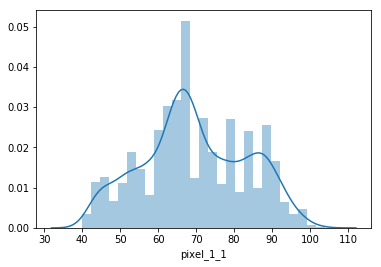

In [25]:
fig, ax = plt.subplots()
sns.distplot(landsat_train['pixel_1_1'], ax=ax);

Let us now visualise all pixels in all bands.

/Users/wushaokang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


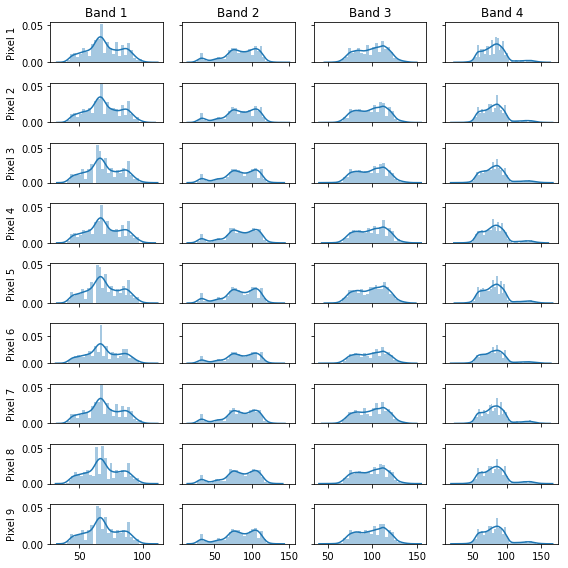

In [26]:
# Make figure with 9 rows and 4 columns
# all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale
fig, ax = plt.subplots(9,4, figsize=(8,8), sharex='col', sharey='row');

# make the plot
pixels = np.arange(1,10) # Pixel values (1-9)
bands = np.arange(1,5) # Spectral band values (1-4)
for ii, pixel in enumerate(pixels):
    for jj, band in enumerate(bands):
        variable_name = 'pixel_' + str(pixel) + '_' + str(band) # Get the variable name of interest
        sns.distplot(landsat_train[variable_name], ax=ax[ii][jj]) # Use a single feature at a time
        ax[ii][jj].xaxis.label.set_visible(False) # don't show the x-axis labels
        
# use a list comprehension to set the band titles for top plots         
[ax[0][ii].set_title("Band {}".format(band)) for ii, band in enumerate(bands)]

# same for the titles in the left-most plots
[ax[ii][0].set_ylabel("Pixel {}".format(pixel)) for ii, pixel in enumerate(pixels)] # 
fig.tight_layout()

It seems like the distributions of the pixel values (intensities) are similar within the same spectral band. This is expected since the data are small $3 \times 3$ image patches that were extracted from multiple locations within a larger image. This makes the data translation invariant, and the exact pixel location does not matter.

## Question 3
Given the observation made above, we now want to visualise the pixel intensity distributions by pooling/stacking all pixels while still keeping the spectral bands separate. Statistically, this means we consider the observations of the different pixels in a given band to be observations from the _same_ random variable.

Modify the code above to produce a figure with 4 subplots (one for each spectral band), and within each subplot show the distribution and kernel density estimate for the pooled pixel intensity values. For each `distplot` set the number of bins equal to 25.

*Hint: for pooling/stacking the pixel values, you might find  the [`reshape()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) numpy function useful.*

In [27]:
# Your code goes here

# extract the columns from the panda object, and then transforming them to a nd array
# we could also first transform the panda object into a nd-array, and then extract the columns but, while not hard,
# this is more error prone since we need to get the indexing right.
pooled_data = []
for ii, band in enumerate(bands):
    # List with all pixels for the specified band
    variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels]
    # DataFrame with selected columns
    df_sel = landsat_train[variable_names]
    # Convert to an np array and stack all pixel values
    pooled_data.append(df_sel.to_numpy().reshape(-1,))  # unspecified dim "-1" is inferred
    
# sanity check that the pooling/stacking worked as intendend
print(len(pooled_data[0])==9*landsat_train.to_numpy().shape[0])

# plot
fig, ax = plt.subplots(1,4, figsize=(15,3))
for ii, band in enumerate(bands):
    sns.distplot(pooled_data[ii], ax=ax[ii], bins=25)
    ax[ii].set_title('Band {}'.format(band)) # Subplot titles
ax[0].set_ylabel('Density, pooled pixels') # ylabel for left-most subplot
fig.tight_layout()

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

## Considering the class labels
Now, suppose we want to visualise the pooled pixel distributions separately for every spectral band, as well as for every class in the dataset. We can do this by filtering the data according to their corresponding label, one class at a time. This gives us some clues about the separability of the different classes.

You are provided with sample code to achieve this. It is similar to the code above but once again, make sure you understand what every line of code does.

In [ ]:
# the figure and the 4 axes
fig, ax = plt.subplots(1,4, figsize=(17,5))

for ii, band in enumerate(bands):
    
    for label in labels:
        # List with all pixels for the specified band
        variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels]
        
        # DataFrame with selected columns, note the way we select the rows with a given label
        mask = landsat_train["label"]==label 
        df_sel = landsat_train.loc[mask, variable_names]
             
        # Convert to an np array and stack all pixel values
        plot_data = df_sel.to_numpy().reshape(-1, )
        
        # plot
        sns.kdeplot(plot_data, ax=ax[ii], label=landsat_labels_dict[label])
        
    ax[ii].set_xlabel('pixel intensities, band {}'.format(band))

# ylabel for left-most subplot
ax[0].set_ylabel('density') 

# Put the legend of the first subfigure outside the plot
ax[0].legend(ncol=6, bbox_to_anchor=(0.5, 0.93), bbox_transform=fig.transFigure, loc='center', frameon=False)

# Remove all legends except the first one
[ax[ii].legend().remove() for ii in np.arange(1,4)];
# alternative: 
# [ax[ii].legend().set_visible(False) for ii in np.arange(1,4)];

For an explanation of the placement of the legend, see e.g. [here](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib/39806180#39806180). In brief, `bbox_to_anchor=(0.5, 0.93)` with ` bbox_transform=fig.transFigure` puts the anchor point of the legend in _figure_ coordinates at $(0.5, 0.93)$, i.e. in the middle of the figure close to the upper boundary. The `loc='center` places the legend centred around the anchor point, i.e. the anchor point is in the centre of the legend.

It looks like the different classes can be discriminated by looking at the distribution of the pooled pixel intensities. This is good news, as it means that already relatively simple classifiers would hopefully be able to predict the right labels from pixel intensity values. 

## Question 4

By observing the above kernel density estimate plots, which classes do you think are easy/difficult to separate when using pixel intensity values only?

*Your answer goes here*

Examples of classes which are easy to separate:
* Cotton crop vs. grey soil
* Soil with vegetation stubble vs. grey soil
* Cotton crop vs. damp grey soil

Examples of classes which are hard to separate:
* Damp grey soil vs. grey soil
* Red soil vs. soil with vegetation stubble
* Red soil vs. grey soil

## Correlations

So far, we have focused on the marginal distributions of the features, ignoring possible dependencies between them. Now, we want to get a feel for the correlations between different features. `Seaborn ` offers the `pairplot()` function, which is an excellent tool for visualising pair-wise relationships between variables.  

The following example  shows the  pairwise relationship between the features `pixel_1_1` and `pixel_1_2`. Refer to the [`pairplot`](http://seaborn.pydata.org/generated/seaborn.pairplot.html) documentation  to understand how this function can be used.  Feel free to experiment with other pairs of variables.

In [ ]:
sns.pairplot(landsat_train, vars = ["pixel_1_1", "pixel_1_2"], \
             plot_kws={'s' : 6}, diag_kws={'bins' : 25}); # Set variables of interest, marker size and bins for histograms

The above plot shows the pair-wise relationship between only two variables. Our feature space is 36-dimensional, so if we wanted to repeat the same procedure for each possible pair of variables  we would end up with a 36 $\times$ 36 figure which would  not be very meaningful (also it would be fairly computationally expensive to produce). 

Instead, we can pool pixels together again, similar to what we did in the previous part, but this time we compute the average pixel value per neighbourhood and spectral band. This time, instead of treating each pixel in the same way and combining all pixel values, we can compute the average pixel value in each spectral band.

The following bit of code does that and saves the result in a new column of the dataframe.

In [ ]:
for band in bands:
    variable_names = ['pixel_' + str(pixel) + '_' + str(band) for pixel in pixels]
    landsat_train['avg_' + str(band)] = landsat_train[variable_names].mean(axis=1)
landsat_train.head(5) # Show the first 5 observations in the updated dataframe

##  Question 5
By using the  `seaborn` `pairplot()` function, show the pairwise correlations between the average pixel values in each spectral band for the training set `landsat_train`. 

*Hint: pick the right columns by using the `vars` argument of the function.*

Which spectral band pairs exhibit the strongest correlations?  Are these correlations expected?

In [ ]:
# Your code goes here
g = sns.pairplot(landsat_train, vars=['avg_' + str(band) for band in bands], \
                 plot_kws={'s' : 6}, diag_kws={'bins' : 25}) # Set marker size and number of bins for histograms

*Your answer goes here*

The strongest correlations appear in pairs (1,2) and (3,4). This is somewhat expected, since  bands 1 and 2 correspond to  the visible region, whereas bands 3 and 4 correspond to the near-infrared region.

## Question 6
The `pairplot` function can also  be used to visualise pair-wise relationships between variables, conditioned on the label, that is, separately for each class.

Modify your code from the previous question to visualise pair-wise relationships between spectral bands, separately for each class. For the diagonal plots, show kernel density estimates instead of histograms  which are shown by default. Do not worry about changing the legend entries or the placement of the legend.

*Hint: make appropriate use of the `hue` and `diag_kind` parameters of the [`pairplot`](http://seaborn.pydata.org/generated/seaborn.pairplot.html) function.*

In [ ]:
#Your code goes here
g = sns.pairplot(landsat_train, vars=['avg_' + str(band) for band in bands], \
                 hue='label', diag_kind = 'kde', plot_kws={'s' : 6})

# optional: to control the placement of the legend
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.set_visible(False) # don't show the default legend

# add legend to the figure
g.fig.legend(handles=handles, labels=labels, title='Class labels',\
             loc='upper center', ncol=len(labels), frameon=False)

# squeeze the top and bottom of the subplots
g.fig.subplots_adjust(top=0.92, bottom=0.08)

From the figure that you obtain, you can see that feature interactions (correlations) exhibit patterns  which are characteristic for the different classes. Thus, we would expect that making use of such information would improve classification performance. This would mean, for instance, that a [Quadratic Discriminant Analysis (QDA)](https://en.wikipedia.org/wiki/Quadratic_classifier) classifier should perform better than a [Gaussian Naive Bayes (GNB)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes) because QDA is sensitive to such correlations while GNB is not, since the GNB classifier assumes conditional independence of the features given the labels.